# Basic Analysis of the data

In [96]:
#Importing libraries
from sklearn import datasets #Using inbuilt datasets
import numpy as np #Using Numpy array
import matplotlib.pyplot as plt #Using for creating plots
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Using LDA
import seaborn as sns
import pandas as pd

In [60]:
#Loading the data
iris = datasets.load_iris()

In [87]:
#Creating data
df = pd.DataFrame(iris.data,columns=iris.feature_names).join(pd.DataFrame(iris.target, columns=['Target']))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [92]:
#Replacing the target value with its name
df['Target'][df['Target']==0]='setosa'
df['Target'][df['Target']==1]='versicolor'
df['Target'][df['Target']==2]='virginica'

# Splitting data into X & y

In [93]:
#Splitting data into X & y
X = df.drop(columns='Target')
y = df['Target']

#Checking the shape of the data
print('X Shape = ',X.shape)
print('y Shape =', y.shape)

X Shape =  (150, 4)
y Shape = (150,)


# LDA

In [94]:
#Implementing LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_r2 = lda.transform(X)

In [95]:
#View the LDA data
X_r2

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

# Visualization of LDA

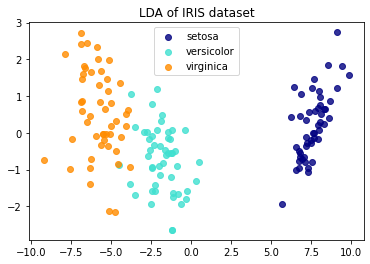

In [7]:
#Creating plots
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']
for colors, i, target_names in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r2[y==i,0],
               X_r2[y==i,1],
               alpha=0.8,
               color = colors,
               label = target_names)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('LDA of IRIS dataset')
plt.show()

In [98]:
#Creating data frame of 
df_X_r2 = pd.DataFrame(X_r2, columns=['LDA1','LDA2']).join(pd.DataFrame(df.Target, columns=['Target']))
df_X_r2

,LDA1,LDA2,Target
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa
...,...,...,...
145,-5.645003,1.677717,virginica
146,-5.179565,-0.363475,virginica
147,-4.967741,0.821141,virginica
148,-5.886145,2.345091,virginica


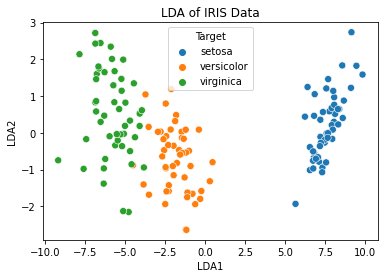

In [104]:
#Visualization
sns.scatterplot(x =df_X_r2.LDA1, y = df_X_r2.LDA2, hue=df_X_r2.Target, s = 50);
plt.title('LDA of IRIS Data');